In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer 
import warnings
warnings.simplefilter('ignore')
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  f1_score, auc, precision_recall_curve, recall_score , precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df_base_titanic = pd.read_csv('train.csv')
df_base_test =pd.read_csv('test.csv')
df_base_titanic.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
df_base_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


## 1º Explorar o dataset
verificar pessoas da mesma familia pelo sobrenome

In [4]:
print(df_base_titanic.shape[0] , 'X' , df_base_titanic.shape[1])

8693 X 14


O dataset tem 8693 linhas e 14 colunas 

In [5]:
df_base_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Notamos diversos features categóricas , principalmente referente a serviços, que podem ser transformadas em dummies, afim de analisar o impacto do passageiro ter usado o serviço no fato de ter sido teletransportado ou não

In [6]:
df_base_titanic.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


Algumas features só apresentam valores no último quartil.
Também seria interressante fazer a mesma análise com as features categóricas como dummies

### Analisar o quanto da base está com valores faltantes 

In [7]:
df_base_titanic.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
# melhorando este insight, vamos analisar o quanto de dados faltante representa de cada feature
nan_ratio = []
for col in df_base_titanic.columns :
    nan_item = []
    nan_item.append(col)
    nan_item.append(df_base_titanic[col].isnull().sum())
    nan_item.append(str(round(100*df_base_titanic[col].isnull().sum() / df_base_titanic.shape[0], 2 ))+ '%')
    nan_ratio.append(nan_item)
    
df_nan = pd.DataFrame(nan_ratio, columns=["Column", "NaN count", "NaN ratio"]).set_index("Column")
df_nan = df_nan.sort_values("NaN ratio", ascending=False)
df_nan.astype(object).T

Column,CryoSleep,ShoppingMall,VIP,HomePlanet,Name,Cabin,VRDeck,FoodCourt,Spa,Destination,RoomService,Age,PassengerId,Transported
NaN count,217,208,203,201,200,199,188,183,183,182,181,179,0,0
NaN ratio,2.5%,2.39%,2.34%,2.31%,2.3%,2.29%,2.16%,2.11%,2.11%,2.09%,2.08%,2.06%,0.0%,0.0%


 As Features possuem cerca de 2.5% dos dados como NaN , o que é um percentual baixo

Apenas as features PassengerID e Transported não possuem nenhum NaN 

### Analisar se a base é desbalanceada

In [9]:
df_base_titanic['Transported'].value_counts(normalize = True)

True     0.503624
False    0.496376
Name: Transported, dtype: float64

O percentual de transportados e não transportados é quase igual. Logo não temos um problema de desbalanceamento aqui

In [10]:
df_base_titanic['Transported'] = np.where(df_base_titanic['Transported'] == True, 1, 0)

### Analisar as features e tratar o dados faltante

In [11]:
df_base_titanic

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0


#### Features categóricas e Booleanas

#1 HomePlanet

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

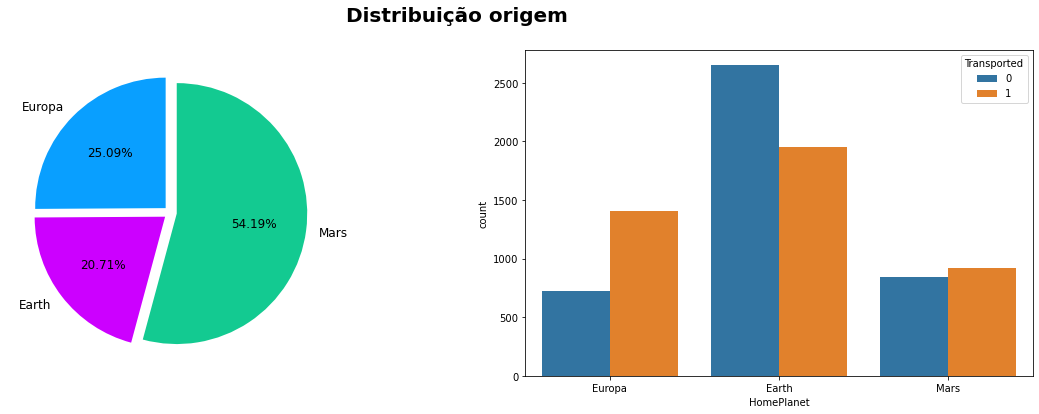

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Distribuição origem', size = 20, weight='bold')

sizes = (df_base_titanic['HomePlanet'].value_counts(sort=False))

labels = df_base_titanic['HomePlanet'].dropna().unique()
colors = ['#099FFF', '#CC00FF', '#13CA91']
explode = (0.05,0.05,0.05) 

ax[0].pie(sizes, colors=colors, explode=explode, startangle=90, labels=labels,
       autopct='%1.2f%%', pctdistance=0.6,textprops={'fontsize':12})
sns.countplot(x='HomePlanet', data=df_base_titanic, hue='Transported', ax=ax[1])

Como verificamos acima que são poucos os valores faltante em cada feature (aprox 2.5%) , em variaveis categóricas vamos usar preencher esses dados com o dado mais frequente. 
Para isso vamos usar a função SimpleImputer do Sklearn, com o parametro strategy='most_frequent'

In [13]:
most_imputer = SimpleImputer(missing_values = np.nan,
                            strategy = 'most_frequent')

In [14]:
df_base_titanic.HomePlanet = most_imputer.fit_transform(df_base_titanic[['HomePlanet']])
df_base_test.HomePlanet = most_imputer.fit_transform(df_base_test[['HomePlanet']]) 

#2 CryoSleep

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

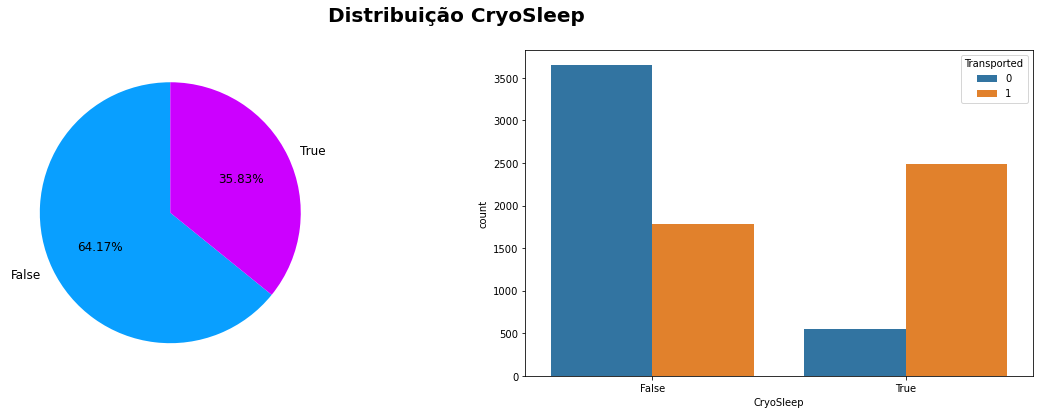

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Distribuição CryoSleep', size = 20, weight='bold')

sizes = (df_base_titanic['CryoSleep'].value_counts())

labels = df_base_titanic['CryoSleep'].dropna().unique()
colors = ['#099FFF', '#CC00FF']

ax[0].pie(sizes, colors=colors,  startangle=90, labels=labels,
       autopct='%1.2f%%', pctdistance=0.6,textprops={'fontsize':12})
sns.countplot(x='CryoSleep', data=df_base_titanic, hue='Transported', ax=ax[1])

In [16]:
df_base_titanic.CryoSleep = most_imputer.fit_transform(df_base_titanic[['CryoSleep']])
df_base_test.CryoSleep = most_imputer.fit_transform(df_base_test[['CryoSleep']]) 

In [17]:
df_base_titanic['CryoSleep'] = np.where(df_base_titanic['CryoSleep'] == True , 1 , 0)
df_base_test['CryoSleep'] = np.where(df_base_test['CryoSleep'] == True , 1 , 0)


#3 Cabin

Precisamos tratar a Feature Cabin. Na documentação está escrito que o número da cabine é composto por deck/num/side, onde side pode ser P para bombordo e S para estibordo. Vamos criar uma duas novas features com essas informações

In [18]:
df_base_titanic['Cabin']

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 8693, dtype: object

In [19]:
# Removendo todas as linhas onde não temos a informção da cabine, já que não podemos assumir nenhum valor para elas.
df_base_titanic['Cabin'] = df_base_titanic['Cabin'].fillna(0)
df_base_test['Cabin'] = df_base_test['Cabin'].fillna(0)

In [20]:
df_base_titanic['Cabin'] = df_base_titanic['Cabin'].astype(str)
df_base_test['Cabin'] = df_base_test['Cabin'].astype(str)

In [21]:
df_base_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   int32  
 3   Cabin         8693 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   int32  
dtypes: float64(6), int32(2), object(6)
memory usage: 883.0+ KB


In [22]:
df_cabines = df_base_titanic["Cabin"].str.extract("(.*?)/(.*?)/(.)")
df_cabines.columns = ["Deck", "Num", "Side"]

df_cabines1 = df_base_test["Cabin"].str.extract("(.*?)/(.*?)/(.)")
df_cabines1.columns = ["Deck", "Num", "Side"]

In [23]:
df_cabines["PassengerId"] = df_base_titanic["PassengerId"]
df_cabines.dropna(inplace=True)
df_cabines.head(4)

,Deck,Num,Side,PassengerId
0,B,0,P,0001_01
1,F,0,S,0002_01
2,A,0,S,0003_01
3,A,0,S,0003_02


In [24]:
df_cabines1["PassengerId"] = df_base_test["PassengerId"]
df_cabines1.dropna(inplace=True)

In [25]:
df_base_test = df_base_test.merge(df_cabines1 , how='left')
df_base_test.drop(['Cabin'], axis=1 , inplace = True)

In [26]:
df_base_titanic = df_base_titanic.merge(df_cabines , how='left')
df_base_titanic.drop(['Cabin'], axis=1 , inplace = True)
df_base_titanic

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,0,P
1,0002_01,Earth,0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,0,S
2,0003_01,Europa,0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,A,0,S
3,0003_02,Europa,0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,A,0,S
4,0004_01,Earth,0,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,A,98,P
8689,9278_01,Earth,1,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,G,1499,S
8690,9279_01,Earth,0,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,G,1500,S
8691,9280_01,Europa,0,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,E,608,S


<AxesSubplot:xlabel='Deck', ylabel='count'>

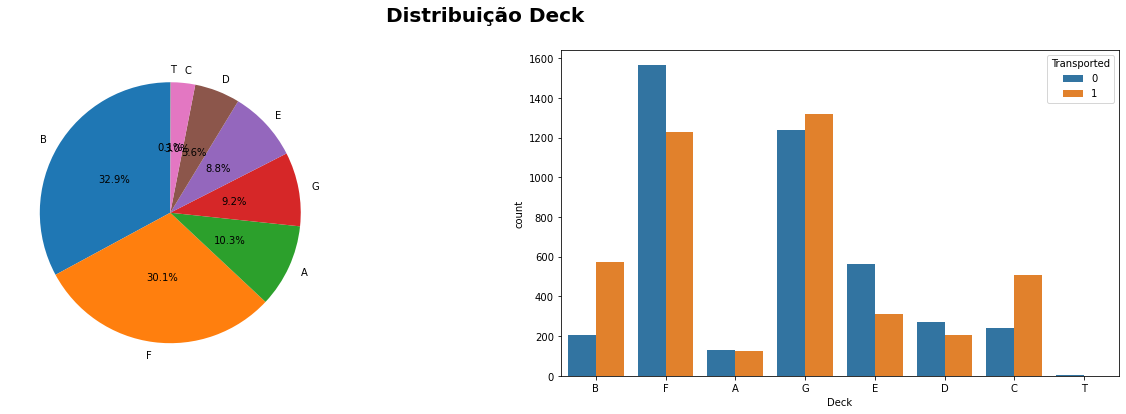

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(22,6))
fig.suptitle('Distribuição Deck', size = 20, weight='bold')

sizes = (df_base_titanic['Deck'].value_counts())

labels = df_base_titanic['Deck'].dropna().unique()
 

ax[0].pie(sizes,  startangle=90, labels=labels,
       autopct='%1.1f%%', pctdistance=0.5,textprops={'fontsize':10})
sns.countplot(x='Deck', data=df_base_titanic, hue='Transported', ax=ax[1])

<AxesSubplot:xlabel='Side', ylabel='count'>

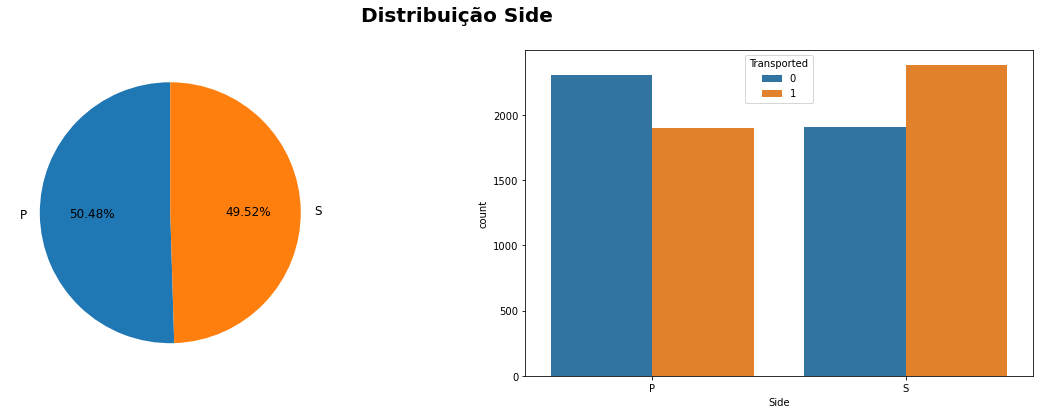

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Distribuição Side', size = 20, weight='bold')

sizes = df_base_titanic['Side'].value_counts()

labels = df_base_titanic['Side'].dropna().unique()
 

ax[0].pie(sizes,  startangle=90, labels=labels,
       autopct='%1.2f%%', pctdistance=0.6,textprops={'fontsize':12})
sns.countplot(x='Side', data=df_base_titanic, hue='Transported', ax=ax[1])

#4 Destination

In [29]:
df_base_titanic.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='count'>

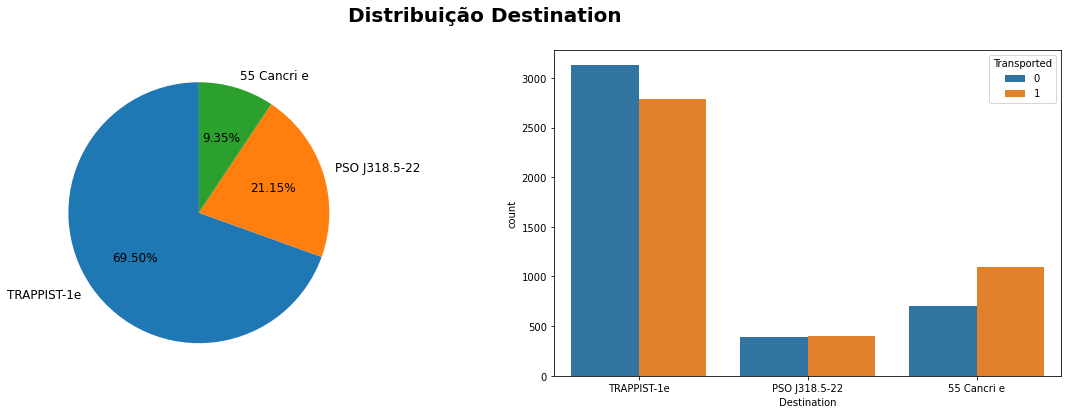

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Distribuição Destination', size = 20, weight='bold')

sizes = df_base_titanic['Destination'].value_counts()

labels = df_base_titanic['Destination'].dropna().unique()

ax[0].pie(sizes,  startangle=90, labels=labels,
       autopct='%1.2f%%', pctdistance=0.6,textprops={'fontsize':12})
sns.countplot(x='Destination', data=df_base_titanic, hue='Transported', ax=ax[1])

In [31]:
df_base_titanic.Destination = most_imputer.fit_transform(df_base_titanic[['Destination']])
df_base_test.Destination = most_imputer.fit_transform(df_base_test[['Destination']])

#5 VIP

<AxesSubplot:xlabel='VIP', ylabel='count'>

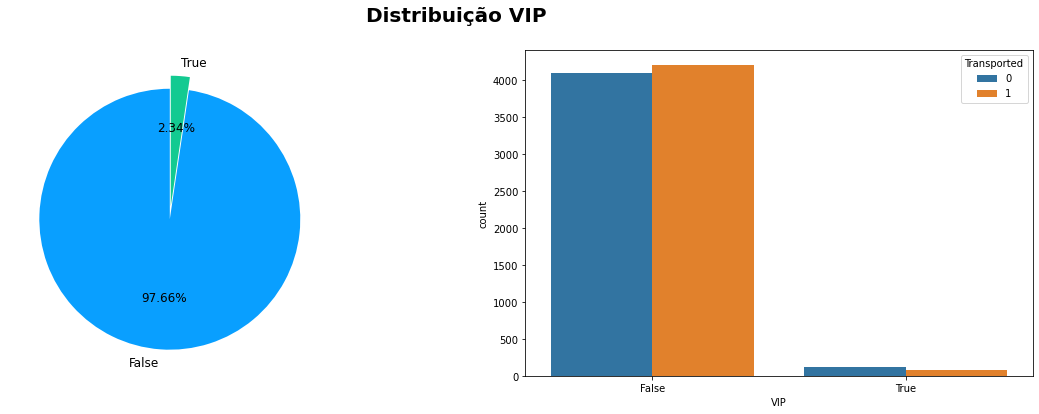

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Distribuição VIP', size = 20, weight='bold')

sizes = (df_base_titanic['VIP'].value_counts())

labels = df_base_titanic['VIP'].dropna().unique()
colors = ['#099FFF',  '#13CA91' ]
explode = (0.05,0.05) 

ax[0].pie(sizes, colors=colors, explode=explode, startangle=90, labels=labels,
       autopct='%1.2f%%', pctdistance=0.6,textprops={'fontsize':12})
sns.countplot(x='VIP', data=df_base_titanic, hue='Transported', ax=ax[1])

1 - Grande maioria dos passageiros não estavam na categoria VIP
2 - Pouca diferença de probabilidade em ser transportado para os que são e não são VIP

In [33]:
df_base_titanic.VIP = most_imputer.fit_transform(df_base_titanic[['VIP']])
df_base_test.VIP = most_imputer.fit_transform(df_base_test[['VIP']])

In [34]:
df_base_titanic['VIP'] = np.where(df_base_titanic['VIP'] == True, 1, 0)
df_base_test['VIP'] = np.where(df_base_test['VIP'] == True, 1, 0)

#6 PassengerId

In [35]:
def create_group_id(passenger_id):
    splitted_id = passenger_id.split("_")
    group_id = splitted_id[1]
    return group_id

In [36]:
df_base_titanic["group_id"] = df_base_titanic["PassengerId"].apply(create_group_id)
df_base_titanic["group_id"] = df_base_titanic["group_id"].astype(int)

In [37]:
df_base_test["group_id"] = df_base_test["PassengerId"].apply(create_group_id)
df_base_test["group_id"] = df_base_test["group_id"].astype(int)

#7 Name

Não há como sabermos os nomes dos passageiros que possuem bilhetes sem nome, então vamos deletar 

In [38]:
#df_base_titanic = df_base_titanic.dropna(subset = ['Name'])
#df_base_test = df_base_test.dropna(subset = ['Name'])


### tratando variaveis númericas com fit_transform

In [39]:
# Aplicando o SimpleImputer para preencher os NaN nas variaveis numéricas
df_base_titanic.Age =  most_imputer.fit_transform(df_base_titanic[['Age']])
df_base_titanic.RoomService =  most_imputer.fit_transform(df_base_titanic[['RoomService']])
df_base_titanic.FoodCourt =  most_imputer.fit_transform(df_base_titanic[['FoodCourt']])
df_base_titanic.ShoppingMall =  most_imputer.fit_transform(df_base_titanic[['ShoppingMall']])
df_base_titanic.Spa =  most_imputer.fit_transform(df_base_titanic[['Spa']])
df_base_titanic.VRDeck =  most_imputer.fit_transform(df_base_titanic[['VRDeck']])

In [40]:
# Aplicando o SimpleImputer para preencher os NaN nas variaveis numéricas
df_base_test.Age =  most_imputer.fit_transform(df_base_test[['Age']])
df_base_test.RoomService =  most_imputer.fit_transform(df_base_test[['RoomService']])
df_base_test.FoodCourt =  most_imputer.fit_transform(df_base_test[['FoodCourt']])
df_base_test.ShoppingMall =  most_imputer.fit_transform(df_base_test[['ShoppingMall']])
df_base_test.Spa =  most_imputer.fit_transform(df_base_test[['Spa']])
df_base_test.VRDeck =  most_imputer.fit_transform(df_base_test[['VRDeck']])

In [41]:
df_base_titanic = pd.get_dummies(df_base_titanic , columns = ['HomePlanet' , 'Destination' , 'Deck' , 'Side'])
df_base_test = pd.get_dummies(df_base_test , columns = ['HomePlanet' , 'Destination' , 'Deck' , 'Side'])


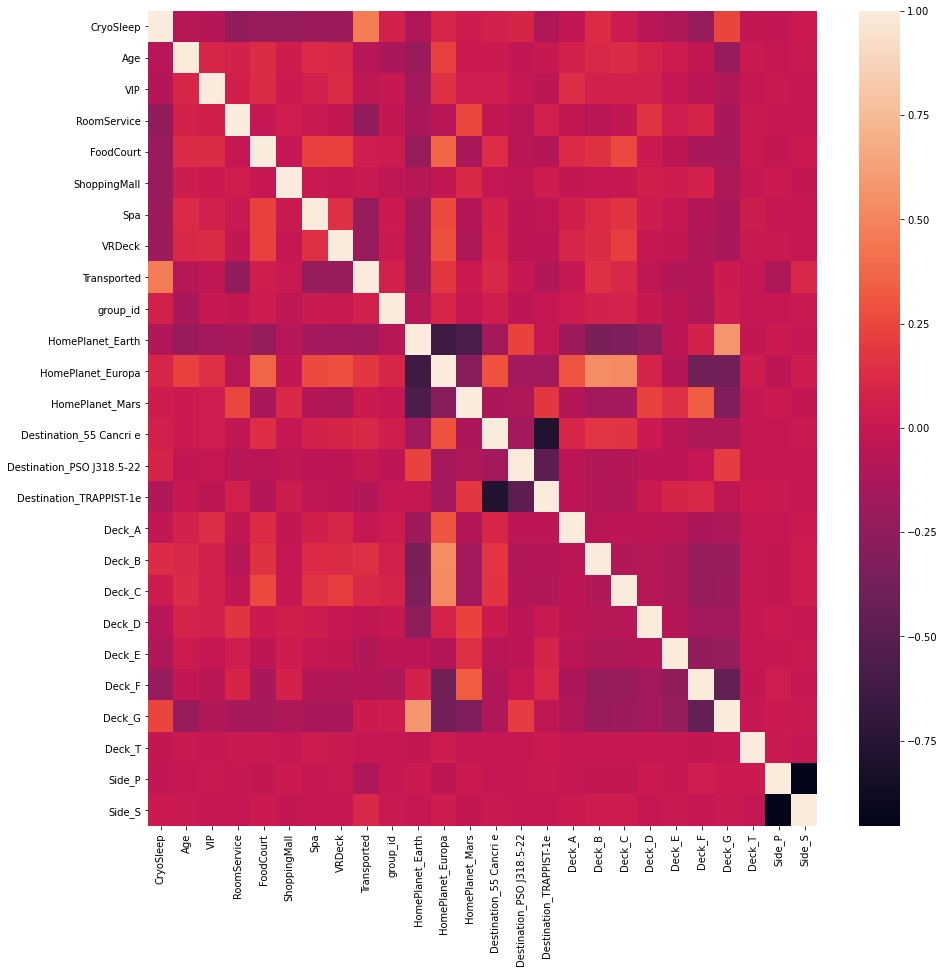

In [42]:
corr = df_base_titanic.corr()
f, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [43]:
df_base_titanic.drop(['PassengerId' , 'Num'] , axis =1 , inplace = True)

In [44]:
df_base_test.drop(['Name'] , axis =1 , inplace = True)
df_base_titanic.drop(['Name'] , axis =1 , inplace = True)


In [45]:
df_base_test.drop(['Num'] , axis =1 , inplace = True)

### Divisão treino e teste

In [46]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [47]:
df_train, df_test = train_test_split(df_base_titanic,
                                         test_size = 0.5 ,
                                         random_state = 0)

In [48]:
X_train , y_train = df_train.drop('Transported' , axis=1) , df_train['Transported']
X_test , y_test = df_test.drop('Transported' , axis=1) , df_test['Transported']

In [ ]:
MinMaxScaler().fit_transform()

In [177]:
X_train[['Age' , 'RoomService' , 'FoodCourt' , 'ShoppingMall' , 'Spa', 'VRDeck']] =  MinMaxScaler().fit_transform(X_train[['Age' , 
                                                                                                                            'RoomService' , 
                                                                                                                            'FoodCourt' , 
                                                                                                                            'ShoppingMall',
                                                                                                                            'Spa',
                                                                                                                            'VRDeck']])

In [178]:
clf = DecisionTreeClassifier(criterion="gini")

In [179]:
model1 = clf.fit(X_train, y_train)

In [180]:
allScores = cross_val_score(clf, X_train, y_train , cv=10)
allScores.mean() # tomamos a média do score

0.7321664283065841

In [181]:
 y_pred = clf.predict(X_test)
print('f1_score' ,round(f1_score(y_test, y_pred, average="macro"),4))
print('precision_score',round(precision_score(y_test, y_pred, average="macro"),4))
print('recall_score', round(recall_score(y_test, y_pred, average="macro"),4)) 

f1_score 0.6743
precision_score 0.6921
recall_score 0.6799


In [182]:
data = pd.DataFrame(clf.feature_importances_,index=list(X_train.columns)).reset_index()
importancia = pd.DataFrame(data)
importancia = importancia.rename({0: 'importancia%'}, axis = 1)
importancia = importancia.rename({'index': 'features'}, axis = 1)

importancia.sort_values(by='importancia%' , ascending = False)

,features,importancia%
0,CryoSleep,0.242418
1,Age,0.179666
4,FoodCourt,0.090647
7,VRDeck,0.078921
6,Spa,0.074561
5,ShoppingMall,0.073269
3,RoomService,0.072172
8,group_id,0.038958
9,HomePlanet_Earth,0.037320
24,Side_S,0.020377


In [208]:
#RandomForestClassifier

In [209]:
clf_2 = RandomForestClassifier(max_depth=24) 

In [210]:
model2 = clf_2.fit(X_train, y_train)

In [211]:
allScores = cross_val_score(clf_2, X_train, y_train , cv=10)
allScores.mean() # tomamos a média do score

0.7880809364902802

In [212]:
y_pred2 = clf_2.predict(X_test)
print('f1_score' ,round(f1_score(y_test, y_pred2, average="macro"),4))
print('precision_score',round(precision_score(y_test, y_pred2, average="macro"),4))
print('recall_score', round(recall_score(y_test, y_pred2, average="macro"),4)) 

f1_score 0.7066
precision_score 0.7167
recall_score 0.7094


In [188]:
#KNeighborsClassifier() 

In [189]:
clf_3 = KNeighborsClassifier() 

In [205]:
model3 = clf_3.fit(X_train, y_train)

In [206]:
allScores = cross_val_score(clf_3, X_train, y_train , cv=10)
allScores.mean() # tomamos a média do score

0.7264177128025848

In [207]:
y_pred3 = clf_3.predict(X_test)
print('f1_score' ,round(f1_score(y_test, y_pred3, average="macro"),4))
print('precision_score',round(precision_score(y_test, y_pred3, average="macro"),4))
print('recall_score', round(recall_score(y_test, y_pred3, average="macro"),4)) 

f1_score 0.5655
precision_score 0.6153
recall_score 0.5899


In [193]:
#LogisticRegression

In [194]:
clf_4 = LogisticRegression(max_iter=5000,  random_state=123)

In [195]:
model4 = clf_4.fit(X_train, y_train)

In [196]:
allScores = cross_val_score(clf_4, X_train, y_train , cv=10)
allScores.mean() # tomamos a média do score

0.7685237565549023

In [197]:
y_pred4 = clf_4.predict(X_test)
print('f1_score' ,round(f1_score(y_test, y_pred4, average="macro"),4))
print('precision_score',round(precision_score(y_test, y_pred4, average="macro"),4))
print('recall_score', round(recall_score(y_test, y_pred4, average="macro"),4)) 

f1_score 0.5233
precision_score 0.5994
recall_score 0.5651


In [213]:
#Submissão

In [214]:
df_base_test1 = df_base_test.copy()

In [215]:
df_base_test1 = df_base_test1.drop(['PassengerId'], axis=1)

In [216]:
predictions = model2.predict(df_base_test1)

In [217]:
output = pd.DataFrame({'PassengerId': df_base_test.PassengerId, 
                       'Transported': predictions})

In [218]:
output['Transported'] = np.where(output['Transported'] == 1, True, False)

In [219]:
output.to_csv('submission.csv', index=False)